## 朴素贝叶斯分类器

In [1]:
# 训练速度快，但是泛化能力比线性分类器要稍差
# 通过单独查看每个特征来学习参数，从每个特征中收集简单的类别统计数据
# GaussianNB, BernoulliNB, MultinomialNB 

## 决策树

In [1]:
# 用于分类和回归任务的模型
# 树的每个节点代表一个问题或者一个包含答案的终节点，叶节点
# 要对新数据点进行预测，首先查看这个点位于特征空间划分的哪个区域
# 然后将该区域的多数目标值作为预测结果，从根节点开始对树进行遍历就可以找到这一个区域
# 每一步向左还是向右取决于是否满足相应的测试
# 这是预测

# 回归的化，基于每个节点的测试对树进行遍历，最终找到新数据点所属的叶节点
# 这一数据点的输出是叶节点中所有训练点的平均目标值

In [2]:
# 防止过拟合有两种策略：
# 1. 及早停止树的生长，为预剪枝，比如限制树的最大深度，限制叶节点的最大数目
# 或者规定一个节点中数据点的最小数目来防止继续划分
# 2. 后剪枝，先构造树，随后删除或者折叠信息量很少的节点

In [4]:
# DecisionTreeRegressor DecisionTreeClassifier
import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42, stratify=cancer.target)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(1.0, 0.9370629370629371)

In [9]:
# 进行预剪枝，限制树的深度
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9882629107981221, 0.951048951048951)

In [10]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=['malignant', 'benign'], feature_names=cancer.feature_names, impurity=False, filled=True)

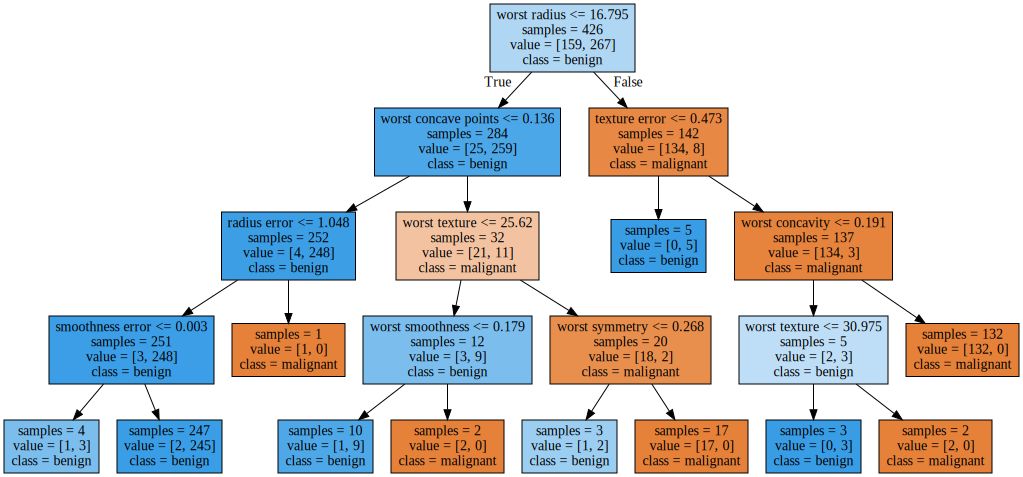

In [15]:
import graphviz
with open('/home/skyrover/repository/lml/tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [16]:
# 特征重要性来表示每个特征对树的决策的重要性排序
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

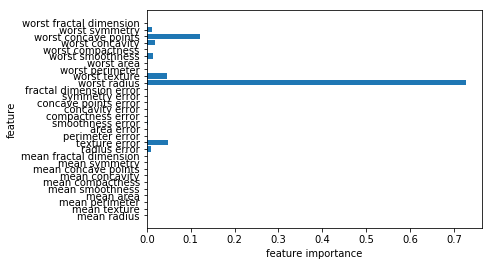

In [21]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    # arange返回等差数组
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")

plot_feature_importances_cancer(tree)

In [20]:
np.arange(5)

array([0, 1, 2, 3, 4])

Feature importances: [0. 1.]


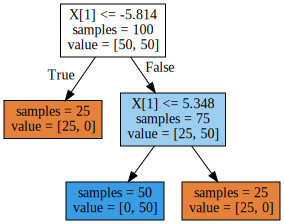

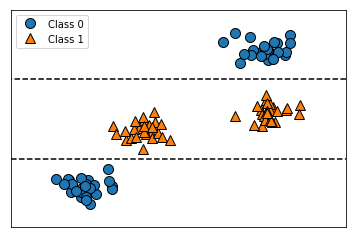

In [23]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [1]:
# 对于所有基于树的回归模型中，不能外推，不能在训练数据范围之外进行预测

In [3]:
import pandas as pd
ram_prices = pd.read_csv("ram_price.csv")

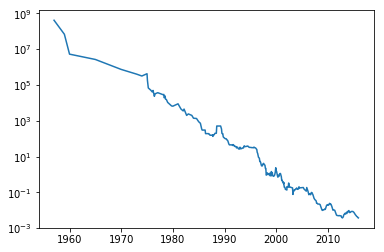

In [12]:
plt.semilogy(ram_prices.date, ram_prices.price)

In [15]:
ram_prices.describe()

,Unnamed: 0,date,price
count,333.000000,333.000000,3.330000e+02
mean,166.000000,1996.878168,1.469755e+06
std,96.273049,11.026537,2.281991e+07
min,0.000000,1957.000000,3.700000e-03
25%,83.000000,1989.670000,1.260000e-01
50%,166.000000,1996.750000,8.000000e+00
75%,249.000000,2005.250000,1.330000e+02
max,332.000000,2015.920000,4.110418e+08


In [25]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

pred_lr

price_tree = np.exp(pred_tree)
pred_lr = np.exp(pred_lr)

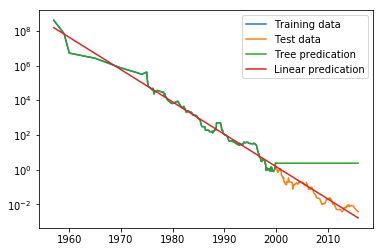

In [27]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree predication")
plt.semilogy(ram_prices.date, pred_lr, label="Linear predication")
plt.legend()

In [ ]:
# 如果超出了模型训练数据的范围，模型就只能持续预测最后一个已知数据点
# 树不能在训练数据的范围之外生成新的响应，所有基于树的模型都有这个缺点

# 选择一种预剪枝策略防止过拟合